In [29]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import *
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl
plt.style.use([hep.style.CMS, hep.style.firamath])
hep.style.use("CMS")
#### test voms connections
# redirector = 'root://xcache/'
# redirector='root://cmsxrootd.fnal.gov/'
# # # files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
# # # files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)


# import uproot
# qcd_mc = uproot.open("root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL16NanoAODAPVv9/QCD_HT300to500_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/106X_mcRun2_asymptoti\
# c_preVFP_v11-v1/50000/B4FFA331-995F-0042-959F-2589393587ED.root")
# uprootevents = qcd_mc['Events']
# print(uprootevents.show("LHEWeight*"))
# print(uprootevents['Generator_scalePDF'].array())
# print(uprootevents['LHEWeight_originalXWGTUP'].array())
# print(uprootevents['LHEPdfWeight'].array())
# print(uprootevents['LHEScaleWeight'].array())

In [30]:
from python.plotting import plotDataMC, plotDataMCwErrors
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
channel = "trijet"
if channel == "dijet":
    fname_p = 'coffeaOutput/dijet/dijetHists_fixherwigxs_QCDsim_rap2.5_MG_nominal__allUncALL.pkl'
    # fname_d = "coffeaOutput/dijet/dijetHists_newUL18JECaddRho_JetHT_rap2.5_allUncALL.pkl"
    # fname_h = "coffeaOutput/dijet/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_herwig_nominal__allUncALL.pkl"
    fname_d = "coffeaOutput/dijet/dijetHists_fixherwigxs_JetHT_rap2.5_allUncALL.pkl"
    fname_h = "coffeaOutput/dijet/dijetHists_fixherwigxs_QCDsim_rap2.5_herwig_nominal__allUncALL.pkl"
    # fname_jk = 'coffeaOutput/dijet/dijetHists_fixherwigxs_QCDsim_rap2.5_MG_nominal_JKallUncALLRespOnly.pkl'
    fname_other = "coffeaOutput/trijet/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
else:
    fname_p = 'coffeaOutput/trijet/trijetHists_figherwigxs_QCDsim_rap2.5_MG_allUncALL.pkl'
    fname_d = "coffeaOutput/trijet/trijetHists_figherwigxs_JetHT_rap2.5_MG_allUncALL.pkl"
    fname_h = "coffeaOutput/trijet/trijetHists_figherwigxs_QCDsim_rap2.5_herwig_allUncALL.pkl"
    fname_jk = 'coffeaOutput/trijet/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalMG_JKallUncALL.pkl'
    fname_other = "coffeaOutput/dijet/dijetHists_newUL18JECaddRho_JetHT_rap2.5_allUncALL.pkl"
# fname_h = "coffeaOutput/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
with open(fname_d, "rb") as f:
    result_data = pickle.load( f )
if "APV" in fname_p:
    year = fname[-11:-4]
elif "ALL" in fname_p:
    year = "UL Run 2"
else:
    year = fname[-8:-4]
with open(fname_p, "rb") as f:
    result_mc = pickle.load( f )
with open(fname_h, "rb") as f:
    result_herwig = pickle.load( f )
fname_d = "coffeaOutput/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
with open(fname_other, "rb") as f:
    result_data_tri = pickle.load( f )
os_path = 'plots/comparison/dijet/'
datasets = [ax for ax in result_herwig['jet_eta_phi_precuts'].project('dataset').axes[0]]
# print(datasets)
datasets_2016APV = [ax for ax in datasets if "APV" in ax]
datasets_2018 = [ax for ax in datasets if "UL18" in ax]
datasets_2017 = [ax for ax in datasets if "UL17" in ax]
datasets_2016 = [ax for ax in datasets if ("UL16" in ax) and ('APV' not in ax)]

datasets_jetht = [ax for ax in result_data['jet_eta_phi_precuts'].project('dataset').axes[0]]
datasets_jetht_2016APV = [ax for ax in datasets if "APV" in ax]
datasets_jetht_2018 = [ax for ax in datasets if "UL18" in ax]
datasets_jetht_2017 = [ax for ax in datasets if "UL17" in ax]
datasets_jetht_2016 = [ax for ax in datasets if ("UL16" in ax) and ('APV' not in ax)]
# print(result_data.keys())
# print(result_data["jet_eta_phi_precuts"])
# # print(result_mc["ptgen_mgen_u"].axes)
# print(result_mc.keys())
# print(result_data["jet_rap_reco"].axes)
# df = pd.DataFrame.from_dict(result_mc['cutflow'])
# display(df)
# df_data = pd.DataFrame.from_dict(result_data['cutflow'])
# display(df_data)

# fname = "coffeaOutput/dijet/dijetHists_remjetveto_DR0p4_QCDsim_rap2.5_herwig_nominal__2018.pkl"
# with open(fname, "rb") as f:
#     result_herwig = pickle.load( f )
# os_path = 'plots/comparison/dijet/'
# datasets = [ax for ax in result_mc['jet_eta_phi_precuts'].project('dataset').axes[0]]
# datasets_2016APV = [ax for ax in datasets if "APV" in ax]
# datasets_2018 = [ax for ax in datasets if "UL18" in ax]
# datasets_2017 = [ax for ax in datasets if "UL17" in ax]
# datasets_2016 = [ax for ax in datasets if ("UL16" in ax) and ('APV' not in ax)]

# print(result_data.keys())
# print(result_data["jet_eta_phi_precuts"])
# print(result_mc["ptgen_mgen_u"].axes)
# print(result_mc["ptreco_mreco_u"].project("ptreco").axes[0])
# # print(result_data["jet_rap_reco"].axes)
df = pd.DataFrame.from_dict(result_data['cutflow'])
pd.set_option('display.max_rows', None)
display(df)
# result = df.to_json("trijet_cutflow_allyears_herwig.json", orient="table")
# print(result) 
# df_data = pd.DataFrame.from_dict(result_data['cutflow'])
# display(df_data)
# df_herwig = df = pd.DataFrame.from_dict(result_herwig['cutflow'])

# display(df_herwig)

,data2016APV,trigger_init,trigger_final,data2016,data2017,data2018
nEvents initial /JetHT/Run2016B-ver1_HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD,9726665.0,NaN,NaN,NaN,NaN,NaN
nEvents initial,374088989.0,NaN,NaN,251352549.0,409008449.0,676743923.0
nEvents after trigger sel,4112772.0,NaN,NaN,3657834.0,10006431.0,8958723.0
nEvents initial /JetHT/Run2016B-ver2_HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD,133752091.0,NaN,NaN,NaN,NaN,NaN
trigsel,4112720.0,NaN,NaN,3657834.0,10006431.0,8958714.0
npv,4110172.0,NaN,NaN,3655989.0,10003169.0,8956699.0
triRecoJet,14943067.0,NaN,NaN,12728485.0,19209430.0,31386577.0
triRecoJet_seq,844380.0,NaN,NaN,838110.0,1772815.0,1877418.0
recoRap2p5,844367.0,NaN,NaN,838099.0,1772803.0,1877393.0
recoRap_seq,844367.0,NaN,NaN,838099.0,1772803.0,1877393.0


In [32]:
# # print(result_mc['cutflow'])
# years_mc = ['pythiaMG2016', 'pythiaMG2016APV','pythiaMG2017', 'pythiaMG2018']
# years_data = ['data2016','data2016APV', 'data2017', 'data2018']
# datayrs = [datasets_2016, datasets_2016APV, datasets_2017, datasets_2018]
# for i, year in enumerate(years_mc):
#     ### plotting phi 
#     axVar = "phi"
#     fig, (ax, rax) = plt.subplots(
#                 nrows=2,
#                 ncols=1,
#                 figsize=(8,7),
#                 gridspec_kw={"height_ratios": (3, 1)},
#                 sharex=True)
#     edges = [bin[0] for bin in result_mc['jet_eta_phi'].project(axVar).axes[0]] + [result_mc['jet_eta_phi'].project(axVar).axes[0][-1][1]]
#     hep.histplot(result_mc['jet_eta_phi_precuts'][{'dataset':datayrs[i]}].project('phi'),  ax = ax,histtype='step', linewidth = 2, color = 'Red',label="Initial")
#     hep.histplot(result_mc['jet_eta_phi_preveto'][{'dataset':year}].project('phi'),  ax = ax,histtype='step', linewidth = 2, color = 'Black',label="After selection")
#     dataval = result_data['jet_eta_phi'][{'dataset':years_data[i]}].project('phi')*result_mc['jet_eta_phi_preveto'][{'dataset':year}].project('phi').integrate('phi').value/result_data['jet_eta_phi'][{'dataset':years_data[i]}].project('phi').integrate('phi').value
#     hep.histplot(dataval, ax = ax, histtype='step', linewidth = 1, color = 'Green',label="Data after vetomap")
#     hep.histplot(result_mc['jet_eta_phi'][{'dataset':year}].project('phi'), ax = ax ,histtype='step', linewidth = 2, color = 'Blue',label="After vetomap")
#     ratio = np.divide(
#                 dataval.values(),
#                 result_mc['jet_eta_phi'][{'dataset':year}].project('phi').values(),
#                 out=np.empty(result_mc['jet_eta_phi'][{'dataset':year}].project('phi').values().shape).fill(np.nan),
#                 where=result_mc['jet_eta_phi'][{'dataset':year}].project('phi').values()!= 0,)
#     hep.histplot(ratio, edges, stack=False, histtype='step', ax=rax, linestyle ="-", color = 'green', linewidth=1)
#     ax.set_xlabel(r"$\phi$")
#     rax.set_ylim(0.9,1.2)
#     leg = ax.legend(loc='lower center', labelspacing=0.25, fontsize='xx-small', title = year[8:])
#     leg.set_visible(True)
#     rax.set_ylabel("Data/MC")
#     fig, (ax, rax) = plt.subplots(
#                 nrows=2,
#                 ncols=1,
#                 figsize=(8,7),
#                 gridspec_kw={"height_ratios": (3, 1)},
#                 sharex=True)
#     axVar = "eta"
#     edges = [bin[0] for bin in result_mc['jet_eta_phi'].project(axVar).axes[0]] + [result_mc['jet_eta_phi'].project(axVar).axes[0][-1][1]]
#     hep.histplot(result_mc['jet_eta_phi_precuts'][{'dataset':datayrs[i]}].project('eta'),ax=ax,  histtype='step', linewidth = 2, color = 'Red',label="Initial")
#     hep.histplot(result_mc['jet_eta_phi_preveto'][{'dataset':year}].project('eta'),ax=ax,  histtype='step', linewidth = 2, color = 'Black',label="After selection")
#     hep.histplot(result_mc['jet_eta_phi'][{'dataset':year}].project('eta'),ax=ax,  histtype='step', linewidth = 2, color = 'Blue',label="After vetomap")
#     dataval = result_data['jet_eta_phi'][{'dataset':years_data[i]}].project('eta')*result_mc['jet_eta_phi_preveto'][{'dataset':year}].project('eta').integrate('eta').value/result_data['jet_eta_phi'][{'dataset':years_data[i]}].project('eta').integrate('eta').value
#     hep.histplot(dataval,ax=ax,  histtype='step', linewidth = 1, color = 'Green',label="Data after vetomap")
#     hep.histplot(ratio, edges, stack=False, histtype='step', ax=rax, linestyle ="-", color = 'green', linewidth=1)
#     ratio = np.divide(
#                 dataval.values(),
#                 result_mc['jet_eta_phi'][{'dataset':year}].project(axVar).values(),
#                 out=np.empty(result_mc['jet_eta_phi'][{'dataset':year}].project(axVar).values().shape).fill(np.nan),
#                 where=result_mc['jet_eta_phi'][{'dataset':year}].project(axVar).values()!= 0,)
#     ax.set_xlabel(r"$\eta$")
#     ax.set_xlim(-3.0,3.0)
#     leg = ax.legend(loc='lower center', labelspacing=0.25, fontsize='xx-small', title = year[8:])
#     leg.set_visible(True)
#     rax.set_ylabel("Data/MC")
#     rax.set_ylim(0.9,1.2)
# fig, (ax, rax) = plt.subplots(
#             nrows=2,
#             ncols=1,
#             figsize=(8,7),
#             gridspec_kw={"height_ratios": (3, 1)},
#             sharex=True)
# hep.histplot(result_mc['jet_eta_phi_precuts'].project('phi'),  histtype='step', ax=ax,linewidth = 2, color = 'Red',label="Initial")
# hep.histplot(result_mc['jet_eta_phi_preveto'].project('phi'),  histtype='step',ax=ax, linewidth = 2, color = 'Black',label="After selection")
# dataval = result_data['jet_eta_phi'].project('phi')*result_mc['jet_eta_phi_preveto'].project('phi').integrate('phi').value/result_data['jet_eta_phi'].project('phi').integrate('phi').value
# hep.histplot(dataval,  histtype='step', linewidth = 2, color = 'Green',ax=ax,label="Data after vetomap")
# hep.histplot(result_mc['jet_eta_phi'].project('phi'),  histtype='step', ax=ax,linewidth = 2, color = 'Blue',label="After vetomap")
# ratio = np.divide(
#             dataval.values(),
#             result_mc['jet_eta_phi'].project('phi').values(),
#             out=np.empty(result_mc['jet_eta_phi'].project('phi').values().shape).fill(np.nan),
#             where=result_mc['jet_eta_phi'].project('phi').values()!= 0,)
# hep.histplot(ratio, edges, stack=False, histtype='step', ax=rax, linestyle ="-", color = 'green', linewidth=1)
# ax.set_xlabel(r"$\phi$")
# rax.set_ylim(0.9,1.2)
# fig, (ax, rax) = plt.subplots(
#             nrows=2,
#             ncols=1,
#             figsize=(8,7),
#             gridspec_kw={"height_ratios": (3, 1)},
#             sharex=True)
# hep.histplot(result_mc['jet_eta_phi_precuts'].project('eta'),  ax=ax,histtype='step', linewidth = 2, color = 'Red',label="Initial")
# hep.histplot(result_mc['jet_eta_phi_preveto'].project('eta'),  ax=ax,histtype='step', linewidth = 2, color = 'Black',label="After selection")
# hep.histplot(result_mc['jet_eta_phi'].project('eta'),  ax=ax,histtype='step', linewidth = 2, color = 'Blue',label="After vetomap")
# dataval = result_data['jet_eta_phi'].project('eta')*(result_mc['jet_eta_phi_preveto'].project('eta').integrate('eta').value/result_data['jet_eta_phi'].project('eta').integrate('eta').value)
# ratio = np.divide(
#             dataval.values(),
#             result_mc['jet_eta_phi'].project('eta').values(),
#             out=np.empty(result_mc['jet_eta_phi'].project('eta').values().shape).fill(np.nan),
#             where=result_mc['jet_eta_phi'].project('eta').values()!= 0,)
# hep.histplot(ratio, edges, stack=False, histtype='step', ax=rax, linestyle ="-", color = 'green', linewidth=1)
# hep.histplot(dataval,  histtype='step', linewidth = 2, ax=ax,color = 'Green',label="Data after vetomap")
# hep.histplot(np.ones_like(dataval.values()), edges, histtype='step', linewidth = 1, ax=rax,color = 'Blue',label="Data after vetomap")
# ax.set_xlabel(r"$\eta$")
# rax.set_ylim(0.9,1.2)
# ax.set_xlim(-3.0,3.0)

(28,)
(19,)
20
(19,)
20
(19,)
20
(19,)
20
(19,)
20
(19,)
20
(19,)
20
(19,)
20


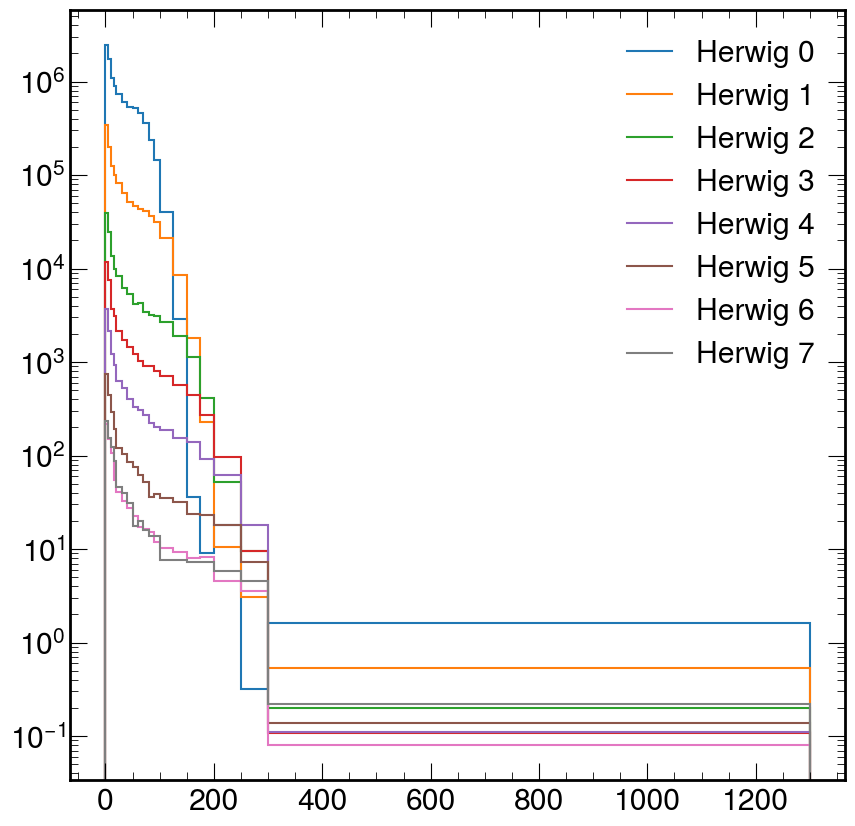

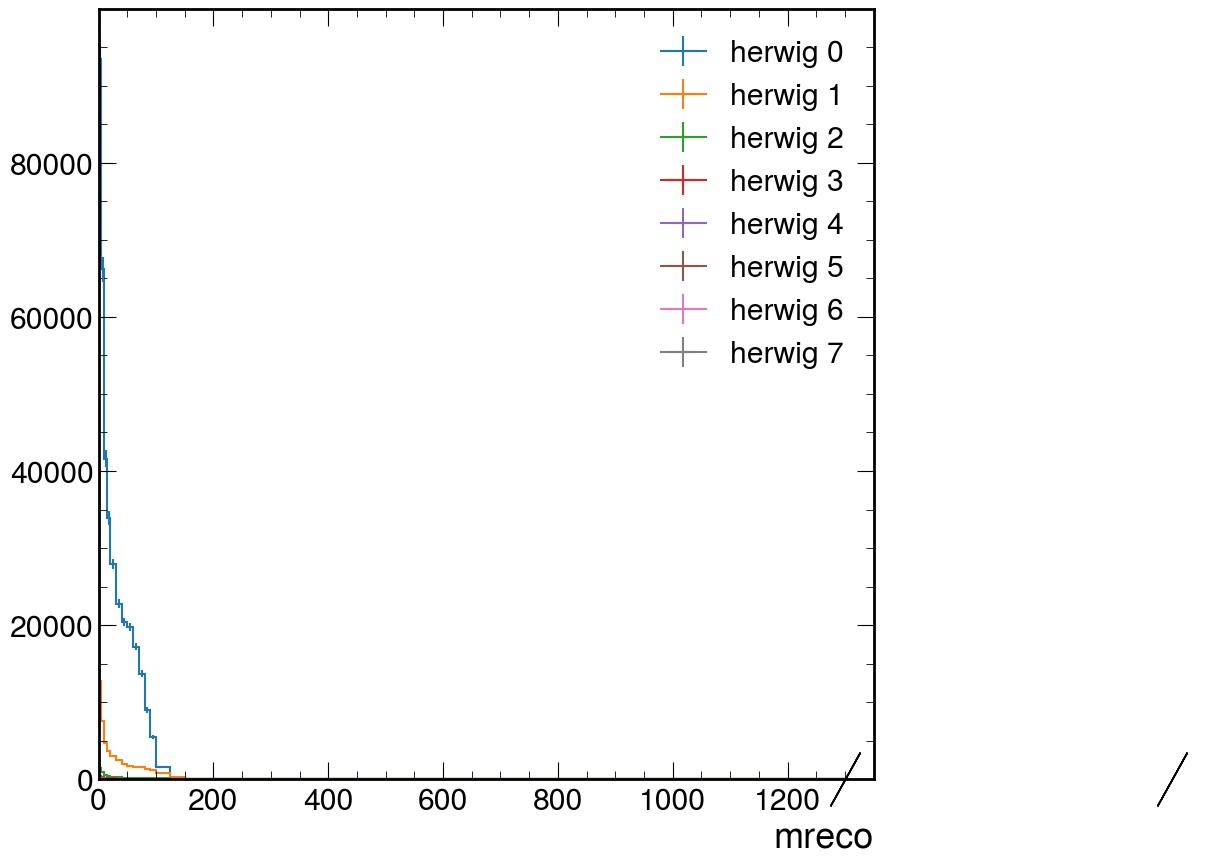

In [33]:
from unfold.unfold_utils.integrate_and_rebin import  rebin_hist
axVar="mreco"
m_edges =  [ 0., 5., 10., 15., 20.,30., 40.,  50.,   60.,
             70.,   80.,   90.,  100., 125.,150.,
            175.,  200.,  250.,  300., 1300.]
# m_edges =  [ 0., 5., 10., 15., 20.,30., 40.,  50., 60.,   70.,    80.,    90.,   100.,   125. ,  150.,   175.,   200.,   250.,
#   300.,   ,1300. ]
# pt_edges = [200, 290, 400, 570, 760, 13000]
axVar = "ptreco"
pt_edges = [bin[0] for bin in result_herwig["response_matrix_u"].project(axVar).axes[0]] + [result_herwig["response_matrix_u"].project(axVar).axes[0][-1][1]]
resp_matrix_4d_herwig = result_herwig["response_matrix_g"][{'syst':"nominal"}]
input_data =  result_data["ptreco_mreco_g"][{'syst':"nominal"}]
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'ptreco', pt_edges)
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco', m_edges )
input_data = rebin_hist(input_data, 'ptreco', pt_edges)
input_data = rebin_hist(input_data, 'mreco',m_edges)
print(result_herwig["response_matrix_g"].project("mreco").values().shape)
fig, ax = plt.subplots()
for i in range(len(pt_edges)-1):
    axVar = "mreco"
    #normed_pythia = resp_matrix_4d_rw[{'syst':syst, 'ptreco':i}].project(axVar).values()*(input_data[{"syst":'nominal', 'ptreco':i}].project(axVar).integrate(axVar).value/resp_matrix_4d_rw[{"syst":'nominal', 'ptreco':i}].project(axVar).integrate(axVar).value)
    normed_herwig = resp_matrix_4d_herwig[{'ptreco':i}].project(axVar).values()*(input_data[{'ptreco':i}].project(axVar).integrate(axVar).value/resp_matrix_4d_herwig[{'ptreco':i}].project(axVar).integrate(axVar).value)
    # plt.stairs(normed_herwig, label="herwig "+str(i))
    print(normed_herwig.shape)
    print(len(m_edges))
    hep.histplot(normed_herwig, m_edges, binwnorm=True, label="Herwig "+str(i))
    ax.set_yscale("log")
    # # plt.stairs(normed_pythia, label="pythia "+i)
    # hep.histplot(input_data[{"syst":'nominal', "ptreco":i}].project(axVar).values(), edges, binwnorm=True, label="data "+str(i))
ax.legend()
fig, ax = plt.subplots()
for i in range(len(pt_edges)-1):
    #normed_pythia = resp_matrix_4d_rw[{'syst':syst, 'ptreco':i}].project(axVar).values()*(input_data[{"syst":'nominal', 'ptreco':i}].project(axVar).integrate(axVar).value/resp_matrix_4d_rw[{"syst":'nominal', 'ptreco':i}].project(axVar).integrate(axVar).value)
    # plt.stairs(normed_herwig, label="herwig "+str(i))
    hep.histplot(resp_matrix_4d_herwig[{"ptreco":i}].project(axVar), binwnorm=True, label="herwig "+str(i))
    # hep.histplot(input_data[{"ptreco":i}].project(axVar), binwnorm=True, label="data "+str(i))
    # ax.set_yscale("log")
    ax.legend()
    ax.set_xlim(0,1350)

dict_keys(['misses', 'misses_g', 'fakes', 'fakes_g', 'underflow', 'underflow_g', 'weights', 'ptreco_mreco_u', 'ptreco_mreco_g', 'rho_reco_u', 'rho_reco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'response_rho_u', 'response_rho_g', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'jkflow', 'alljet_ptreco_mreco', 'btag_eta', 'leading_pt', 'njet_gen', 'njet_reco', 'dphimin_gen', 'dphimin_reco', 'asymm_reco', 'asymm_gen', 'mass_orig', 'sdmass_orig', 'sdmass_ak8corr', 'sdmass_ak4corr', 'jet_rap_reco', 'jet_rap_gen', 'jet_phi_gen', 'jet_phi_reco', 'jet_eta_phi_precuts', 'jet_eta_phi_preveto', 'jet_pt_eta_phi', 'fakes_eta_phi', 'fakes_asymm_dphi', 'ptreco_mreco_fine_u', 'ptreco_mreco_fine_g'])
Hist(
  StrCategory([], growth=True, name='dataset', label='Primary dataset'),
  StrCategory([], growth=True, name='syst', label='Systematic'),
  IntCategory([], growth=True, name='jk', label='Jackknife section'),
  Regular(500, 100, 10100, name='pt', label='$p_T$ [GeV]'),
  Regular(130, 0, 1300, name='mas

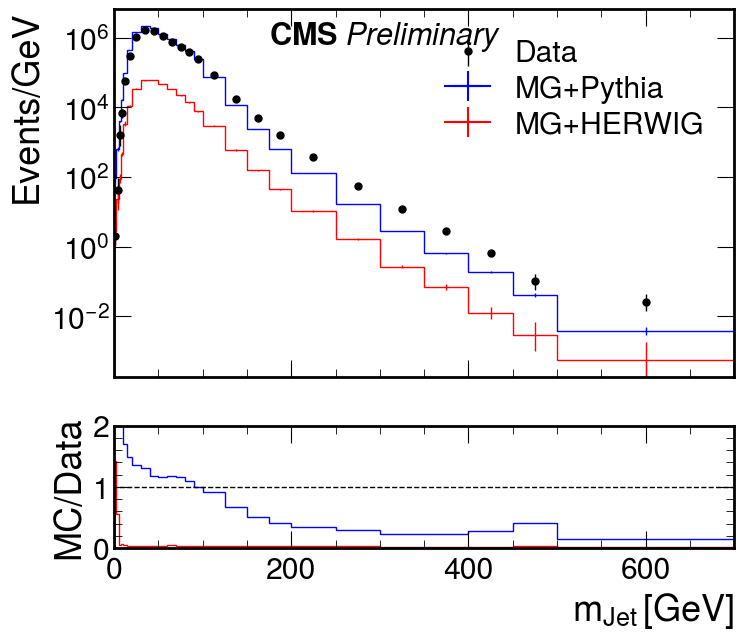

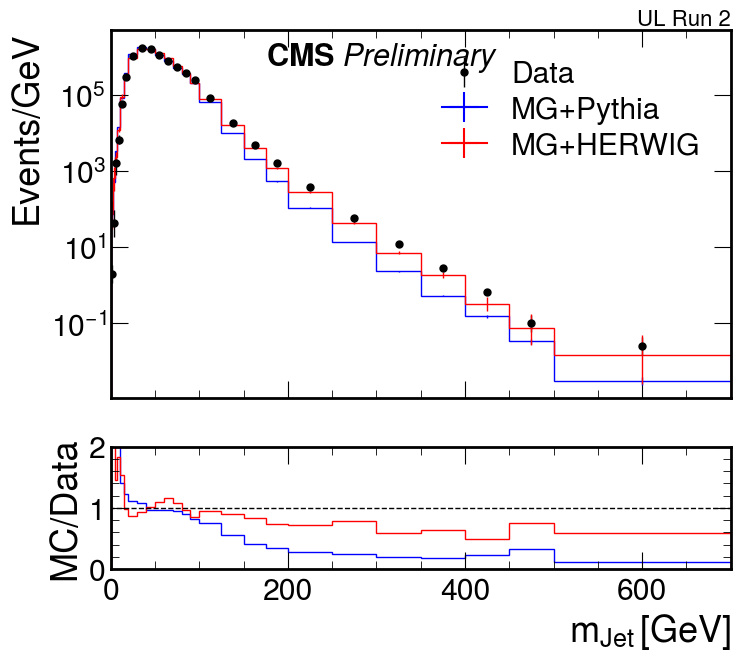

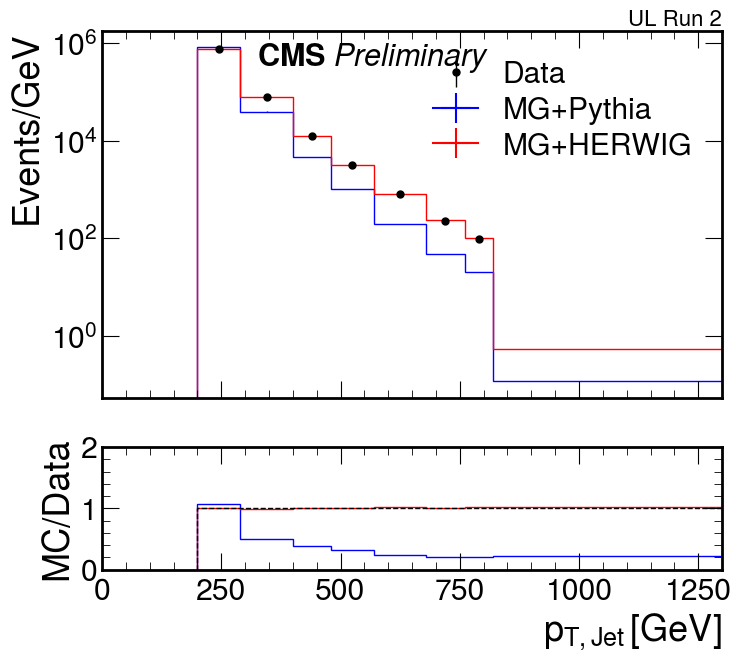

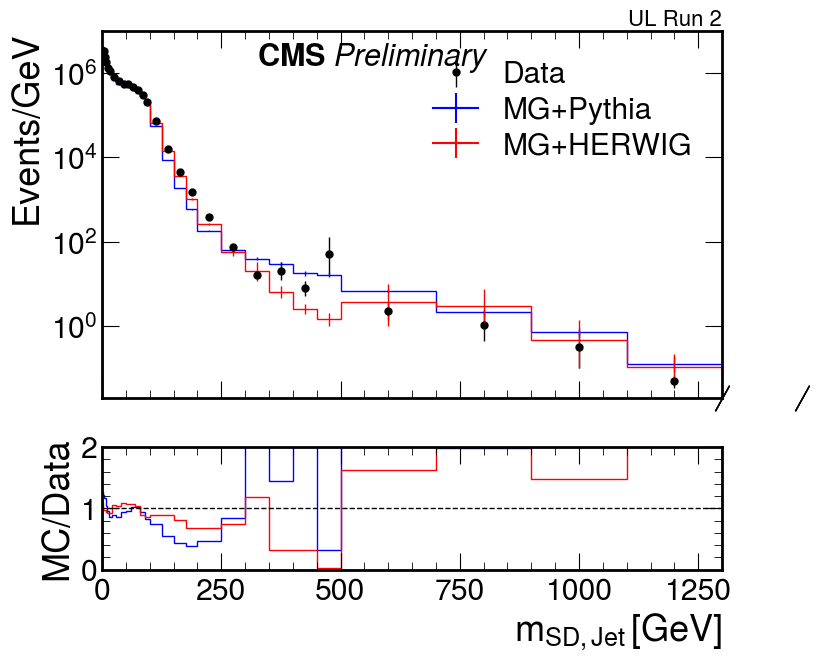

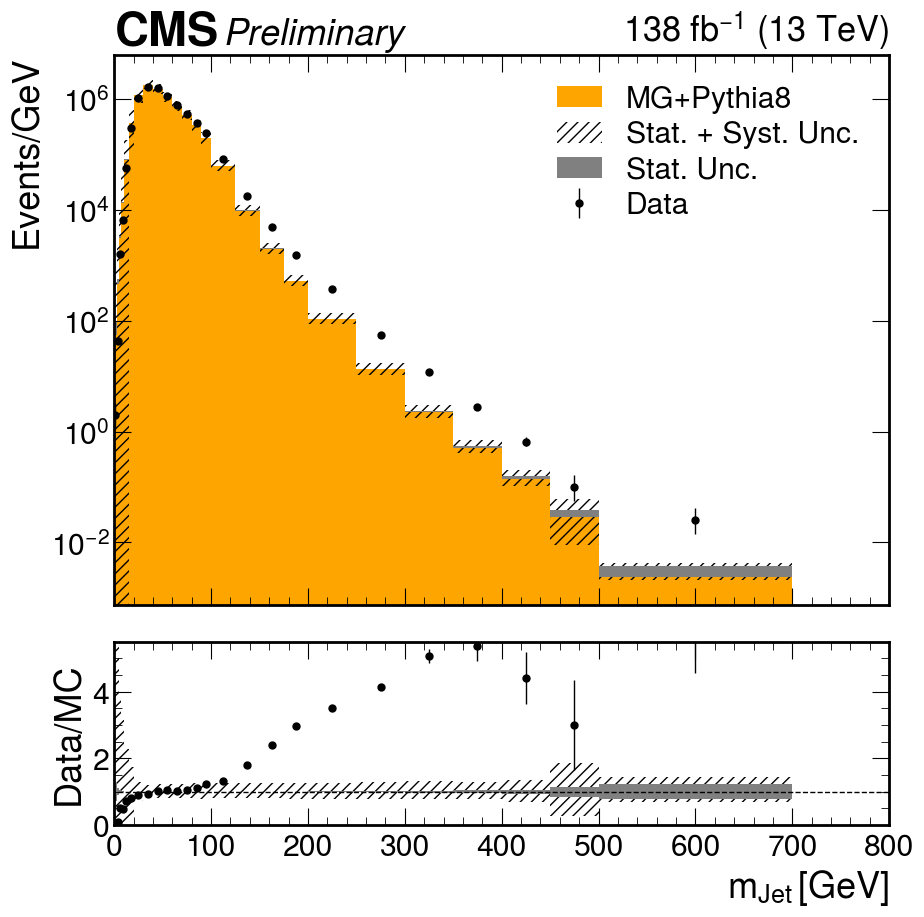

nomvals shape before summing  (28,)
Syst vals shape  (28,)
shape of tot syst output  (28,)


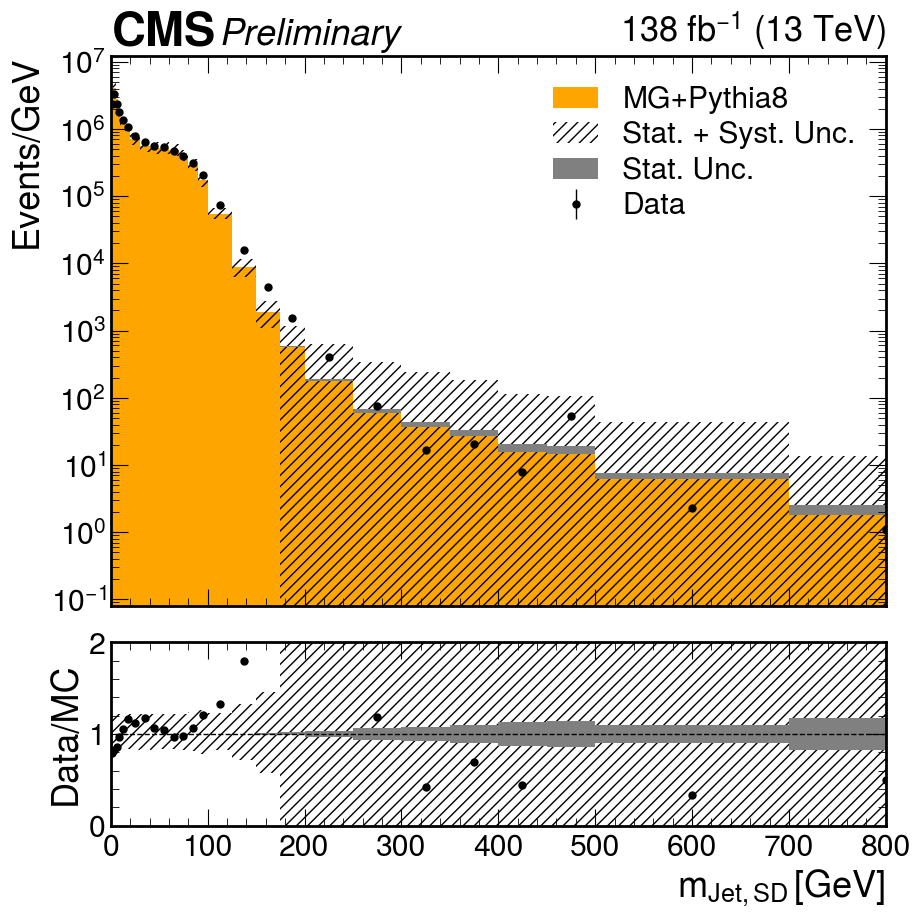

nomvals shape before summing  (8,)
Syst vals shape  (8,)
shape of tot syst output  (8,)
Trimming last bin to be size of second to last bin
Original widths  [   90.   110.    80.    90.   110.    80.    60. 12180.]
Original edges  [200.0, 290.0, 400.0, 480.0, 570.0, 680.0, 760.0, 820.0, 13000.0]
New widths  [ 90. 110.  80.  90. 110.  80.  60. 680.]
New edges  [200.0, 290.0, 400.0, 480.0, 570.0, 680.0, 760.0, 820.0, 1500.0]
new ticks  [200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, '$\\infty$']


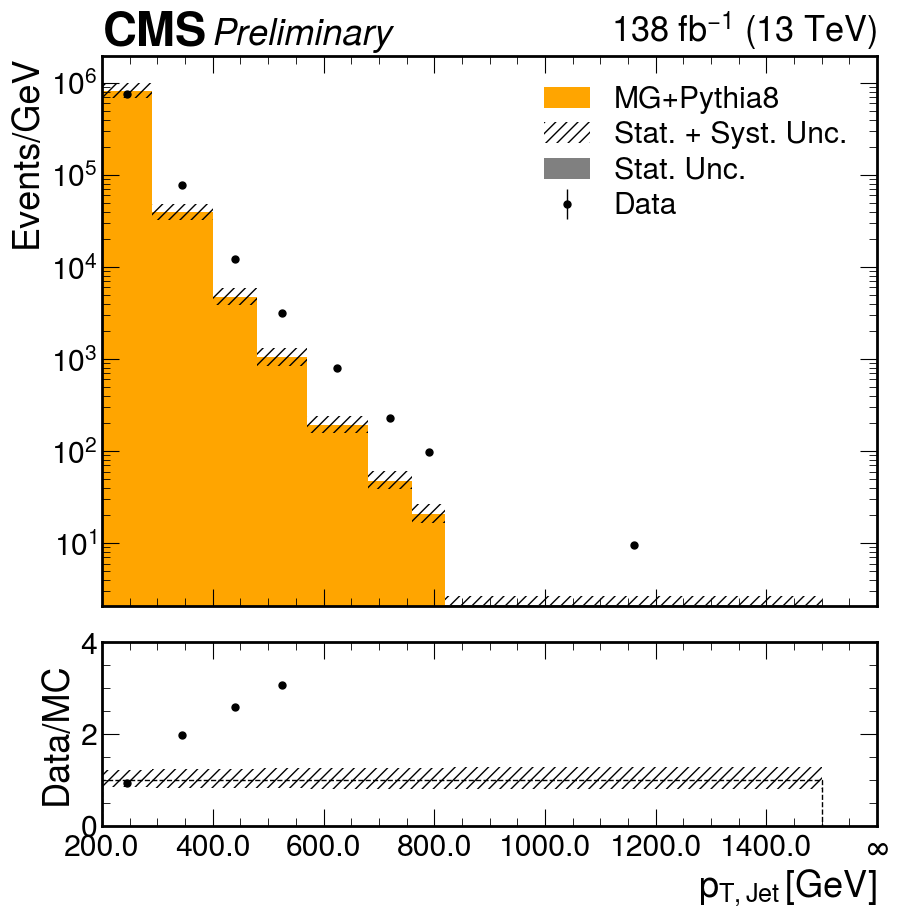

nomvals shape before summing  (25,)
Syst vals shape  (25,)
shape of tot syst output  (25,)
4.0


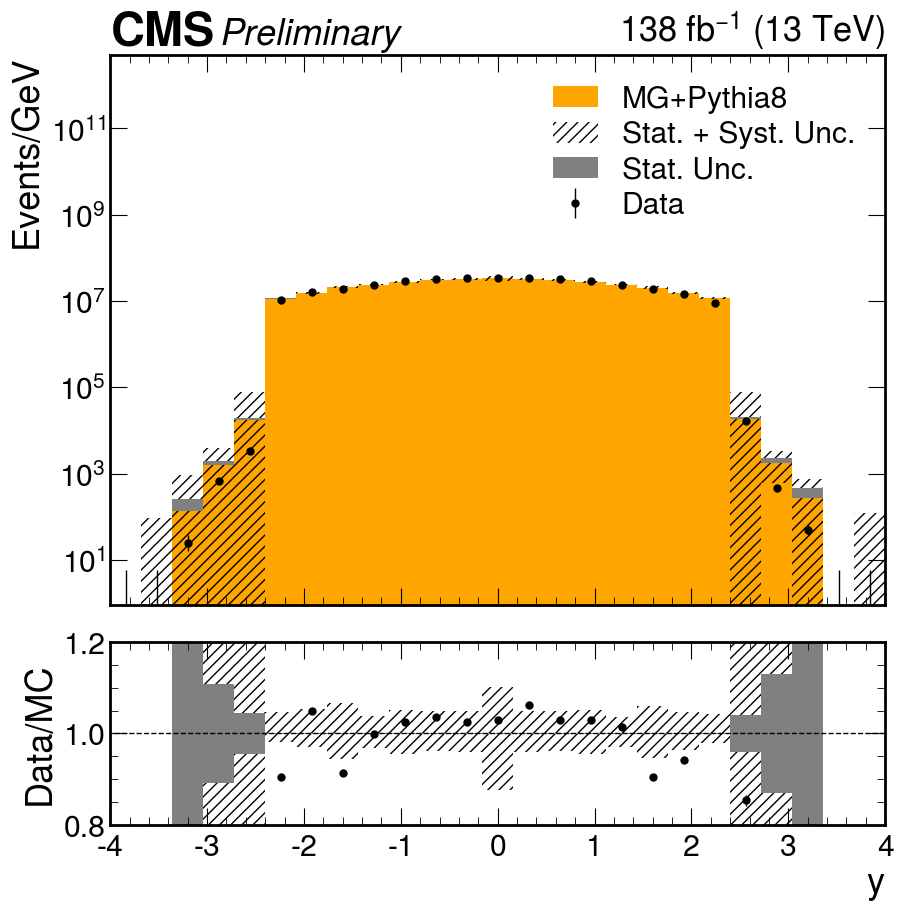

nomvals shape before summing  (25,)
Syst vals shape  (25,)
shape of tot syst output  (25,)


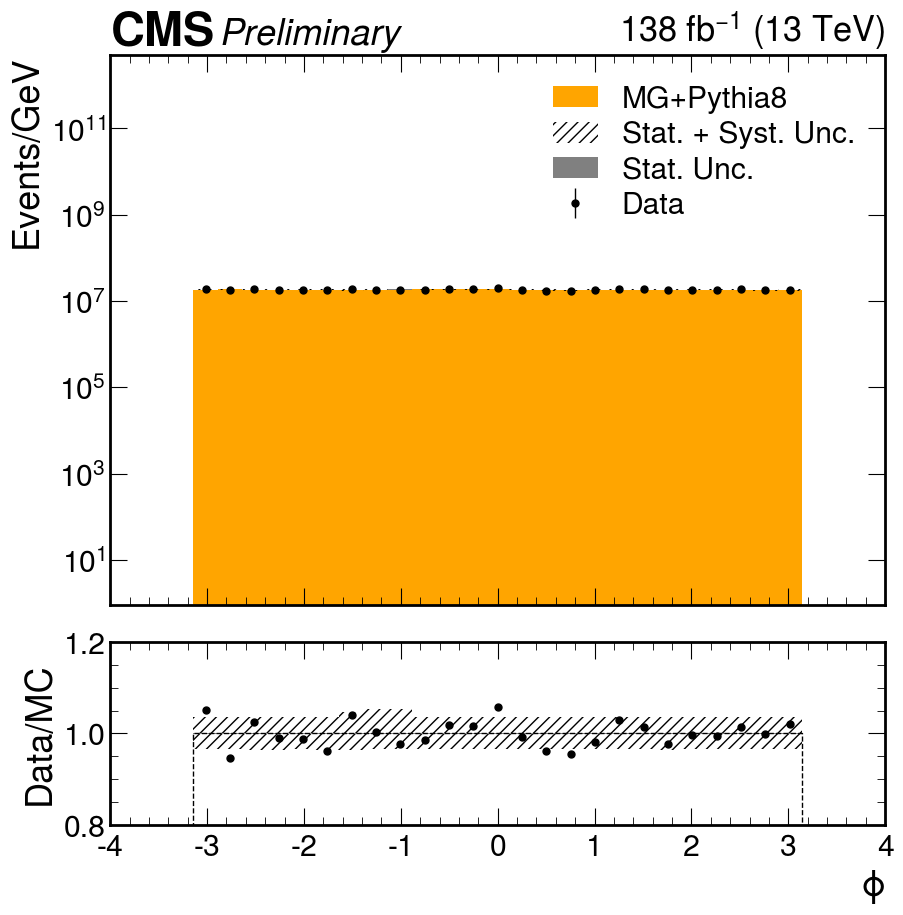

In [34]:
print(result_data.keys())
print(result_data["ptreco_mreco_fine_u"])
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco",result_herwig = result_herwig,norm=False, xlim=700.)
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", result_herwig = result_herwig, IOV=year, channel = channel, norm=True, xlim=700.)
plt.savefig("plots/herwig_mjet_"+channel+".png", bbox_inches='tight')
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "ptreco", result_herwig = result_herwig,IOV=year, channel =channel ,norm=True, xlim=1300.)
plt.savefig("plots/herwig_pt_"+channel+".png", bbox_inches='tight')
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", result_herwig=result_herwig,
        IOV=year, channel = "dijet", norm=True,xlim=1300.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=year, rax_lim = [0.,5.5], channel = channel, norm=True, xlim=800.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=year, rax_lim = [0.,2.0], channel = channel, norm=True, xlim=800.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "ptreco", IOV=year, rax_lim = [0.,4.], channel = channel, norm=True, trim=1500.)
plotDataMCwErrors(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", IOV=year, rax_lim = [0.8,1.2], channel = channel, norm=True,ylim = [0, 5e12])
plotDataMCwErrors(result_mc, result_data, "jet_phi_reco", 'jet_phi_reco', "phi", IOV=year, rax_lim = [0.8,1.2], channel = channel, norm=True, ylim = [0, 5e12], xlim=4.)
#plotDataMC(result_mc, result_data, "asymm_reco", 'asymm_gen', "frac",  IOV=2018, channel = "dijet")


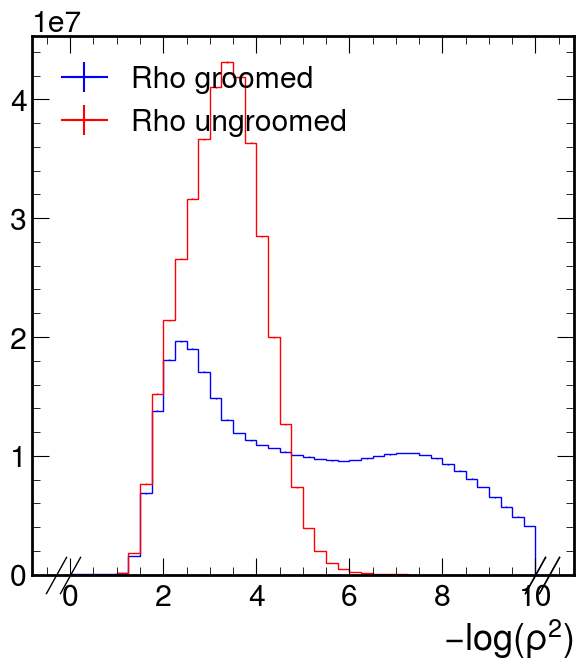

In [35]:
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),
                    sharex=True)
hep.histplot(result_mc["response_rho_g"][{'syst':"nominal"}].project("rhoreco"), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Rho groomed")
hep.histplot(result_mc["response_rho_u"][{'syst':"nominal"}].project("rhoreco"), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'red', linewidth=1, label = "Rho ungroomed")
leg = ax.legend(loc=2)

In [36]:
#### Plot dijet systematics
def comparePlots(hists, denom_hist, axVar):
    axVar = "mgen"
    edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
    availAxes = [ax.name for ax in result_mc[histname].axes]
    availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
    print([ax for ax in result_mc[histname].project("syst").axes[0]])
    print("Available axes: ", availAxes)
    print("Available systs ", availSysts)
    fig, (ax, rax) = plt.subplots(
                    nrows=2,
                    ncols=1,
                    figsize=(7,7),
                    gridspec_kw={"height_ratios": (3, 1)},
                    sharex=True)
    hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    ax.set_xlim(0, 1000)
    rax.set_xlim(0, 1000)
    histname="ptgen_mgen_u"
    hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Matched events ungroomed")
    # histname = "fakes"
    # axVar="mreco"
    # print(result_mc[histname])
    # availAxes = [ax.name for ax in result_mc[histname].axes]
    # availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
    # print([ax for ax in result_mc[histname].project("syst").axes[0]])
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
    ratio_misses = np.divide(result_mc["misses"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values(),
                          out=np.empty(np.array(result_mc["misses"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                          where=result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
    hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
    hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    rax.set_ylim(0, 1.0)

Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 290, 400, 480, 570, 680, 760, 820, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 5, 10, 20, 40, 60, 80, 100, 150, 200, 300, 400, 500, 900, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=2.51533e+07, variance=4.50154e+08) (WeightedSum(value=6.36057e+07, variance=1.71218e+09) with flow)
Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 290, 400, 480, 570, 680, 760, 820, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 5, 10, 20, 40, 60, 80, 100, 150, 200, 300, 400, 500, 900, 1300], name='mgen', label='m_{GEN

(0.0, 0.5)

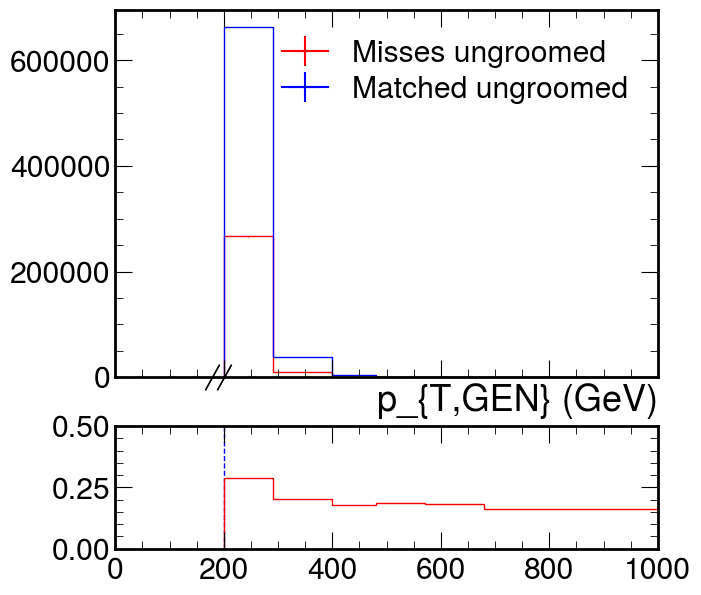

In [37]:
#### Plot dijet systematics
histname="misses"
print(result_mc[histname][{'syst':'nominal'}])
print(result_mc["ptgen_mgen_u"][{'syst':'nominal'}])
axVar = "ptgen"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
ax.set_xlim(0, 1000)
rax.set_xlim(0, 1000)
histname="ptgen_mgen_u"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Matched events ungroomed")
# histname = "fakes"
# axVar="mreco"
# print(result_mc[histname])
# availAxes = [ax.name for ax in result_mc[histname].axes]
# availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
# print([ax for ax in result_mc[histname].project("syst").axes[0]])
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
ratio_misses = np.divide(result_mc["misses"][{'syst':"nominal"}].project(axVar).values(),(result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()+result_mc["misses"][{'syst':"nominal"}].project(axVar).values()),
                      out=np.empty(np.array(result_mc["misses"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                      where=result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
leg = ax.legend(loc='best', labelspacing=0.25)
leg.set_visible(True)
rax.set_ylim(0, 0.5)

['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'RelativeStatECDown', 'RelativeStatFSRUp', 'RelativeStatFSRDown', 'RelativeStatHFUp', 'RelativeStat

(0.0, 0.5)

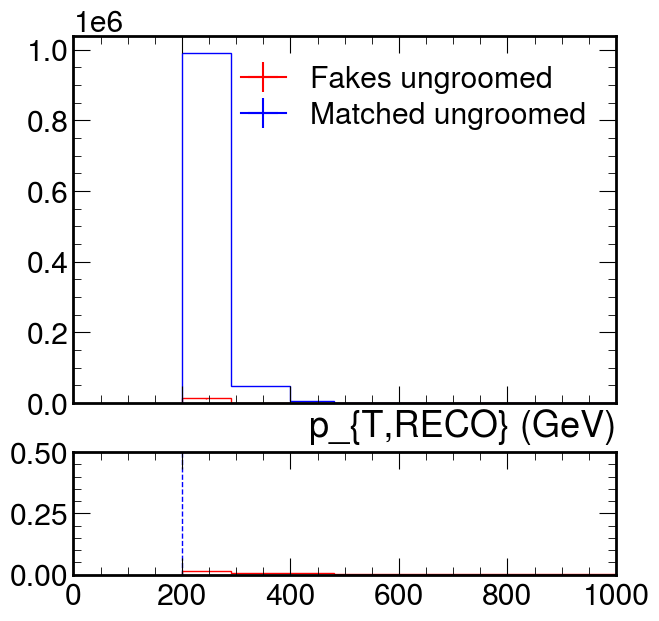

In [38]:
#### Plot dijet systematics
histname="fakes"
axVar = "ptreco"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Fakes ungroomed')
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
ax.set_xlim(0, 1000)
rax.set_xlim(0, 1000)
histname="ptreco_mreco_u"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
ratio_misses = np.divide(result_mc["fakes"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptreco_mreco_u"][{'syst':"nominal"}].project(axVar).values(),
                      out=np.empty(np.array(result_mc["fakes"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                      where=result_mc["ptreco_mreco_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
leg = ax.legend(loc='best', labelspacing=0.25)
leg.set_visible(True)
rax.set_ylim(0, 0.5)

['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'RelativeStatECDown', 'RelativeStatFSRUp', 'RelativeStatFSRDown', 'RelativeStatHFUp', 'RelativeStat

(0.0, 0.5)

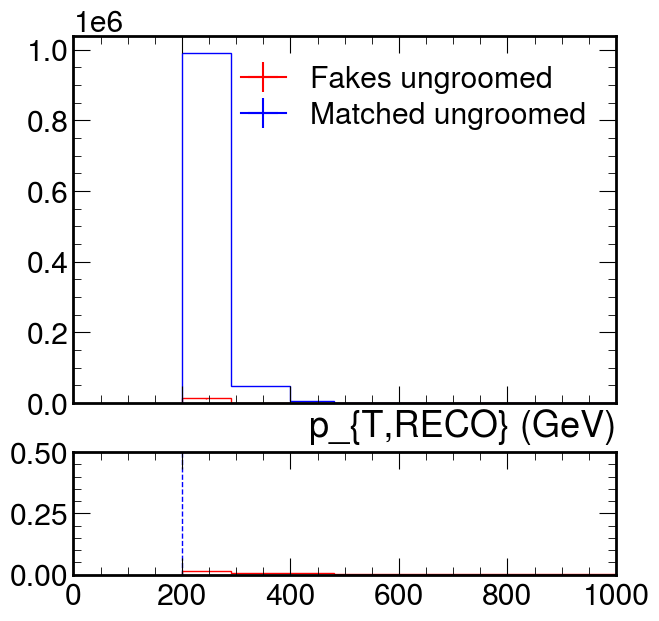

In [39]:
#### Plot dijet systematics
histname="fakes"
axVar = "ptreco"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Fakes ungroomed')
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
ax.set_xlim(0, 1000)
rax.set_xlim(0, 1000)
histname="ptreco_mreco_u"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
ratio_misses = np.divide(result_mc["fakes"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptreco_mreco_u"][{'syst':"nominal"}].project(axVar).values(),
                      out=np.empty(np.array(result_mc["fakes"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                      where=result_mc["ptreco_mreco_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
leg = ax.legend(loc='best', labelspacing=0.25)
leg.set_visible(True)
rax.set_ylim(0, 0.5)

dict_keys(['misses', 'misses_g', 'fakes', 'fakes_g', 'underflow', 'underflow_g', 'weights', 'ptreco_mreco_u', 'ptreco_mreco_g', 'rho_reco_u', 'rho_reco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'response_rho_u', 'response_rho_g', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'jkflow', 'alljet_ptreco_mreco', 'btag_eta', 'leading_pt', 'njet_gen', 'njet_reco', 'dphimin_gen', 'dphimin_reco', 'asymm_reco', 'asymm_gen', 'mass_orig', 'sdmass_orig', 'sdmass_ak8corr', 'sdmass_ak4corr', 'jet_rap_reco', 'jet_rap_gen', 'jet_phi_gen', 'jet_phi_reco', 'jet_eta_phi_precuts', 'jet_eta_phi_preveto', 'jet_pt_eta_phi', 'fakes_eta_phi', 'fakes_asymm_dphi', 'ptreco_mreco_fine_u', 'ptreco_mreco_fine_g'])


KeyError: 'jet_eta_phi'

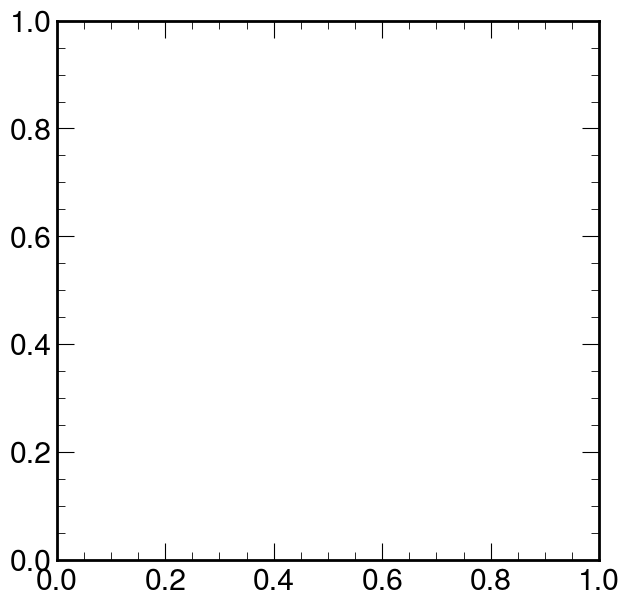

In [40]:
######## Plotting eta phi to check against jet veto maps
print(result_mc.keys())
year = '2016APV'
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),)
phi_edges = [bin[0] for bin in result_mc["jet_eta_phi"].project("phi").axes[0]] + [result_mc["jet_eta_phi"].project("phi").axes[0][-1][1]]
rap_edges = [bin[0] for bin in result_mc["jet_eta_phi"].project("eta").axes[0]] + [result_mc["jet_eta_phi"].project("eta").axes[0][-1][1]]
print(phi_edges)
print(rap_edges)
print(result_mc["jet_eta_phi_preveto"])
hep.hist2dplot(result_mc["jet_eta_phi"][{"syst":"nominal", 'dataset':'pythiaMG'+str(year)}].project("eta", "phi"))
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.14, 3.14)
hep.cms.label("Preliminary", data = False, year = year, loc=0, ax=ax, fontsize=16)
ax.set_ylabel(r'Jet $\phi$')
ax.set_xlabel(r'Jet $\eta$')
######## Plotting eta phi to check against jet veto maps
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),)
hep.hist2dplot(result_data["jet_eta_phi"][{"syst":"nominal", 'dataset':'data'+str(year)}].project("eta", "phi"))
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.14, 3.14)
ax.set_ylabel(r'Jet $\phi$')
ax.set_xlabel(r'Jet $\eta$')
hep.cms.label("Preliminary", data = True, loc=0, year = year, ax=ax, fontsize=16)

In [ ]:
mc_ax = 'ptreco_mreco'
pt_bins = [bin[0] for bin in result_mc[mc_ax+"_u"].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+"_u"].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+"_u"].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+"_u"].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mc_ax+"_u"][{'mreco':i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_u_"+year+".png")

In [ ]:
pt_bins = [bin[0] for bin in result_mc[mc_ax+"_g"].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+"_g"].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+"_g"].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+"_g"].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,20)

fig, axs = plt.subplots(4, int(len(pt_bins)/2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_g"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':1*i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':1*i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_g_"+year+".png")

In [ ]:
mcgen_ax = "ptgen_mgen"
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mcgen_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mcgen_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+1))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    print("Bin ", i, " ", result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen').values(flow=False))
    print("Uncertainty ", i, " ", result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen').variances())
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mcgen_ax+'_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.2, hspace=0.20)
hep.histplot(result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', 
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc[mcgen_ax+'_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
print("Bin under ", result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen').values(flow=False))
print("Uncertainty under ", result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen').variances())
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtGenMGen_u_"+year+".png")

In [ ]:
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mcgen_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mcgen_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc[mcgen_ax+'_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mcgen_ax+'_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,4E7])
    axm.set_xlim([0,1000])
    axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.0, hspace=0.20)
hep.histplot(result_mc[mcgen_ax+'_g'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc[mcgen_ax+'_g'][{'mgen':hist.underflow,  'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.savefig(os_path+"/unrolledPtGenMGen_g_"+year+".png")

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
# fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
year = fname[-8:-4]
fname = "coffeaOutput/trijetHists_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print(result_mc.keys())
print(result_data.keys())
# print(result_mc["cutflow"])
print(result_mc["jet_rap_reco"].axes)
print(result_data["asymm_reco"].axes)
checkdir(os_path)

In [ ]:
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "ptreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "asymm_reco", 'asymm_reco', "frac", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "dphimin_reco", 'dphimin_reco', "dphi", 
           IOV=2018, channel = "trijet")

In [ ]:

histname="fakes"
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, axs = plt.subplots(2,2,figsize=(20,14),)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[0], linestyle ='-', color = 'red', linewidth=1, label = 'fakes ungroomed')
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[1], linestyle ='-', color = 'red', linewidth=1, label = 'fakes ungroomed')
axs.flatten()[0].set_xlim(0, 300)
histname="fakes_g"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[0], linestyle ='-', color = 'blue', linewidth=1, label = "Fakes groomed")
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Fakes groomed")
axs.flatten()[1].set_xlim(0, 2000)
histname = "fakes_eta_phi"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("eta"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("phi"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
for ax in axs.flatten():
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)

In [ ]:
pt_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+'_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':2*i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':2*i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,10000])
    # axm.set_xlim([0,2000])
    # axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco"+year+".png")

In [ ]:
mc_ax = "ptgen_mgen"
pt_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mc_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)
fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptgen':i,'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mc_ax+"_u"][{'mgen':i,'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,2000])
    # ax.set_ylim([0,10000])
    # axm.set_xlim([0,2000])
    # axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtGenMGen.png")

In [ ]:
mc_ax = "ptreco_mreco"
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc[mc_ax+'_u'][{'ptreco':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc[mc_ax+'_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
data = [result_data['ptreco_mreco_u'][{'syst':'nominal'}].project('mreco'), 
        result_data['ptreco_mreco_g'][{ 'syst':'nominal'}].project('mreco'),
       result_data['ptreco_mreco_u'][{ 'syst':'nominal'}].project('ptreco'), 
        result_data['ptreco_mreco_g'][{ 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Trijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc[mc_ax+'_u'][{ 'syst':syst}].project('mreco'), result_mc[mc_ax+'_g'][{'syst':syst}].project('mreco'),
             result_mc[mc_ax+'_u'][{'syst':syst}].project('ptreco'), result_mc[mc_ax+'_g'][{'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc[mc_ax+'_u'][{'syst':'nominal'}].project('mreco'), result_mc[mc_ax+'_g'][{'syst':'nominal'}].project('mreco'),
      result_mc[mc_ax+'_u'][{'syst':'nominal'}].project('ptreco'), result_mc[mc_ax+'_g'][{'syst':'nominal'}].project('ptreco')]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='errorbar',binwnorm=True,
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    # main_ax.set_yscale("log")
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                        rp_num_label="data",
                                        rp_denom_label="mc",
                                        rp_uncert_draw_type="line",
                                        ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
                                               )
    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_NoneHEMveto2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("DATA KEYS ", result_data.keys())
print("MC KEYS ", result_mc.keys())

In [ ]:
plotDataMC(result_mc, result_data, "jet_pt_mass_reco_u", 'jet_pt_mass_reco_u', "ptreco", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "jet_pt_mass_reco_u", 'jet_pt_mass_reco_u', "mreco", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", 
           IOV=2018, channel = "trijet")
#plotDataMC(result_mc, result_data, "jet_dphi_reco", 'jet_dphi_reco', "dphi", IOV=2018, channel = "trijet")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='step',
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("Softest Trijet QCD_binnned MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2016.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("Sotest Trijet QCD_binned MC 2016")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2017.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity nobtag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print("Gluon purity all jets ", result_nobtag['cutflow']['nSoftestJets']/(result_nobtag['cutflow']['nJets']))
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2017")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2017.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2017")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2017.png")

In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2018")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2018")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018.png")

In [ ]:
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result['cutflow'].keys())
print("fakes: ", result['cutflow']["fakes nominal"])
print("misses: ", result['cutflow']["misses nominal"])

In [ ]:
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())
print(result['alljet_ptreco_mreco'])
print(result["cutflow"].keys())
print("Gluon fraction: ", result['cutflow']['nSoftestGluonJets']/result['cutflow']['n3Jets'])

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity1.7_nominal2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())
print(result['alljet_ptreco_mreco'])
print(result["cutflow"].keys())
print("Gluon fraction: ", result['cutflow']['nSoftestGluonJets']/result['cutflow']['n3Jets'])

In [ ]:
nobtag_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
pdgbb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('frac') ]
pdgbb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('frac') ]
pdgb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('frac') ]
pdgb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('frac') ]
nums = [pdgbb_num, pdgb_num, nobtag_num]
denoms = [pdgbb_denom, pdgb_denom, nobtag_denom]
btag_names = ['pdg bb', 'pdg b', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 test btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018test.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2016 test")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018test.png")

In [ ]:
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(3, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
axs[0,0].set_xlabel("Jet1 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
axs[0,1].set_xlabel("Jet1 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
axs[0,2].set_xlabel("Jet1 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
axs[1,0].set_xlabel("Jet2 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
axs[1,1].set_xlabel("Jet2 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
axs[1,2].set_xlabel("Jet2 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,0], overlay='partonFlav')
axs[2,0].set_xlabel("Jet3 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,1], overlay='partonFlav')
axs[2,1].set_xlabel("Jet3 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,2], overlay='partonFlav')
axs[2,2].set_xlabel("Jet3 eta (GeV)")
for ax in axs.flatten():
    ax.legend()
print(axs)
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")
plt.savefig(os_path+'/singleJetPtEtaPhi_partons' + ".png")